<a href="https://colab.research.google.com/github/Khadijah-Trawally/QuantumGraphColoring/blob/main/test_graph_coloring_hamiltonian_with_cost_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUBO Formulation for Quantum Graph Coloring

The formulation of QUBO for the graph coloring problem involves minimizing an objective function \( f(\mathbf{x}) \) subject to certain constraints. The cost function is defined as follows:

\begin{equation}
    \text{minimize } f(\mathbf{x}) = \mathbf{x}^T Q \mathbf{x}
\end{equation}

where \( \mathbf{x} \) is a vector of binary variables, and \( Q \) is a symmetric matrix.

For chromatic sum minimization, the objective function \( f(\mathbf{x}) \) is defined as:

\begin{equation}
    f(\mathbf{x}) = \sum_{i=1}^{n} \sum_{k=1}^{c} k x_{ik}^2
\end{equation}

In the graph coloring problem, a valid coloring is represented by a set of binary variables \( x_{ik} \) taking values in \{0, 1\}, defined as:

\begin{equation}
    x_{ik}=
\begin{cases}
    1 & \text{if node } i \text{ is assigned color } k \\
    0 & \text{otherwise}.
\end{cases}
\end{equation}

Here, \( i \in \{1, 2, ..., n\} \) represents the nodes in the graph, and \( k \in \{1, 2, ..., c\} \) represents the available colors, where \( n \) is the number of nodes and \( c \) is the number of colors.

These constraints are formulated such that any violation results in a quadratic penalty being added to the objective function \cite{dinneen2019finding}. The constraints are twofold:

### 1. All Nodes Must Be Colored
To ensure that each node is assigned exactly one color, the constraint is given as:

\begin{equation}
    \sum_{k=1}^{c} x_{ik} = 1
\end{equation}

We introduce a penalty term \( P_1(\mathbf{x}) \) that penalizes the violation of this constraint. The penalty term for node \( i \) is given by:

\begin{equation}
    P_1(\mathbf{x}) = \sum_{i=1}^{n} \left(1 - \sum_{k=1}^{c} x_{ik}\right)^2
\end{equation}

### 2. Adjacent Nodes Must Have Different Colors
This constraint is expressed as:

\begin{equation}
    x_{ik} + x_{jk} \leq 1
\end{equation}

The penalty term \( P_2(\mathbf{x}) \) is introduced to enforce this constraint, penalizing configurations where adjacent nodes have the same color. The penalty term for edge \( (i, j) \) is given by:

\begin{equation}
    P_2(\mathbf{x}) = \sum_{(i,j) \in E} \sum_{k=1}^{c} x_{ik}x_{jk}
\end{equation}

The equivalent Ising Hamiltonian is obtained from the QUBO problem by mapping binary to spin variables. Each binary variable \( x_{ik} \) is mapped to a spin variable \( \sigma_{ik} \) using the relation:

\begin{equation}
    x_{ik} = \frac{\sigma_{ik} + 1}{2}
\end{equation}

where \( x_{ik} = 1 \) corresponds to \( \sigma_{ik} = 1 \) and \( x_{ik} = 0 \) corresponds to \( \sigma_{ik} = -1 \).

### Cost Function

\begin{align}
f(\sigma) &= \sum_{i=1}^{n} \sum_{k=1}^{c} k\left(\frac{\sigma_{ik} + 1}{2}\right) \\
&= \frac{1}{2}\sum_{k=1}^{c} nk + \frac{1}{2}\sum_{i=1}^{n}\sum_{k=1}^{c} k \sigma_{ik}
\end{align}

### Problem Hamiltonian

The problem Hamiltonian \( H_p \) is derived from the QUBO formulation as given below:

\begin{equation}
H_p(\mathbf{x}) = f(\mathbf{x}) + \lambda_1 P_1(\mathbf{x}) + \lambda_2 P_2(\mathbf{x})
\end{equation}

where \( \lambda_1 \) and \( \lambda_2 \) are penalty constants.

### Expanding \( P_1(x}) \)

\begin{align}
P_1(\mathbf{x}) &= \sum_{i=1}^{n} \left(1 - \sum_{k=1}^{c} x_{ik}\right)^2 \\
&= \sum_{i=1}^{n} \left(1 - 2\sum_{k=1}^{c} x_{ik} + \left(\sum_{k=1}^{c} x_{ik}\right)^2\right) \\
&= \sum_{i=1}^{n} \left(1 - \sum_{k=1}^{c} x_{ik} + 2\sum_{k=1}^{c-1}\sum_{k'=k+1}^{c} x_{ik}x_{ik'}\right)
\end{align}

Given that \( x_{ik} \) is a binary variable in \{0,1\}, this implies \( x_{ik} = x_{ik}^2 \). Hence:

\begin{equation}
H_p(\mathbf{x}) = \lambda_1\sum_{i=1}^{n} \left(1 - \sum_{k=1}^{c} x_{ik} + 2\sum_{k=1}^{c-1}\sum_{k'=k+1}^{c} x_{ik}x_{ik'}\right) + \lambda_2\sum_{(i,j) \in E} \sum_{k=1}^{c} x_{ik} x_{jk}
\end{equation}

### Transforming the Hamiltonian

To transform the problem Hamiltonian from binary variables into spin variables, we use the mapping in equation \eqref{eq:spin_var}. This gives:

\begin{align}
H_p(\sigma) &= \lambda_1\sum_{i=1}^{n} \left(1 - \sum_{k=1}^{c} \frac{\sigma_{ik} + 1}{2} + 2\sum_{k=1}^{c-1}\sum_{k'= k+1}^{c} \frac{\sigma_{ik} + 1}{2} \cdot \frac{\sigma_{ik'} + 1}{2}\right) \nonumber \\
&\quad + \lambda_2\sum_{(i,j) \in E} \sum_{k=1}^{c} \left(\frac{\sigma_{ik} + 1}{2}\right) \left(\frac{\sigma_{jk} + 1}{2}\right) \\
&= \underbrace{\lambda_1\sum_{i=1}^{n} \left(1 - \frac{1}{2}\sum_{k=1}^{c} 1 + \frac{1}{2}\sum_{k=1}^{c-1}\sum_{k'= k+1}^{c} 1\right) + \frac{1}{4}\lambda_2\sum_{(i,j) \in E} \sum_{k=1}^{c} 1}_{\textbf{P}} \nonumber \\
&\quad + \underbrace{\lambda_1\sum_{i=1}^{n} \left(- \frac{1}{2}\sum_{k=1}^{c} \sigma_{ik} + \frac{1}{2}\sum_{k=1}^{c-1}\sum_{k'=k+1}^{c} \left(\sigma_{ik} + \sigma_{ik'}\right)\right) + \frac{1}{4}\lambda_2\sum_{(i,j) \in E} \sum_{k=1}^{c} \left(\sigma_{ik} + \sigma_{jk}\right)}_{\textbf{H}_\text{S}(\sigma)}  \nonumber \\
&\quad + \underbrace{\frac{1}{2}\lambda_1\sum_{i=1}^{n} \sum_{k=1}^{c-1}\sum_{k'=k+1}^{c}  \sigma_{ik}\sigma_{ik'} +\frac{1}{4}\lambda_2\sum_{(i,j) \in E} \sum_{k=1}^{c}\sigma_{ik}\sigma_{jk}}_{\textbf{H}_\text{int}(\sigma)}
\end{align}

Equation \eqref{eq:full_ham} breaks down \( H_p \) into three components: \( P \), denoting the constants; \( H_s \), representing the single-spin Hamiltonian (i.e., non-interacting spins); and \( H_\text{int} \), which describes spin-spin interactions.

These terms are simplified further to obtain the full Ising Hamiltonian in


\begin{align}
P &= \lambda_1\sum_{i=1}^{n} \left(1 - \frac{1}{2}\sum_{k=1}^{c} 1 + \frac{1}{2}\sum_{k=1}^{c-1}\sum_{k'= k+1}^{c} 1 \right) + \frac{1}{4}\lambda_2\sum_{(i,j) \in E} \sum_{k=1}^{c} 1  \nonumber \\
&= \lambda_1\sum_{i=1}^{n} \left(1 - \frac{1}{2}c + \frac{1}{4}c(c-1) \right) + \frac{1}{4}\lambda_2\sum_{(i,j) \in E} c \\
&= \frac{1}{4}\lambda_1\left(4nc + nc\left(c-3\right)\right) + \frac{1}{4}\lambda_2 c \cdot |E|
\end{align}
\(|E|\) represents the total number of edges in the graph i.e., the total number of connections between pairs of nodes.

Now, simplifying \(H_{s}\):
\begin{align}
H_{s} &= \lambda_1\sum_{i=1}^{n} \left( - \frac{1}{2} \sum_{k=1}^{c} \sigma_{ik} + \frac{1}{2}\underbrace{ \sum_{k' > k=1}^{c} \sigma_{ik}}_{\sum_{k=1}^{c}\left (c - k \right) \sigma_{ik}} + \frac{1}{2} {\sum_{k' > k=1}^{c}\sigma_{ik'}} \right) + \frac{1}{4}\lambda_2 {\sum_{(i,j) \in E} \sum_{k=1}^{c}  \left({\sigma_{ik} + \sigma_{jk}}\right)}\\
&= {\frac{1}{2}\lambda_1}\sum_{i=1}^{n} \sum_{k=1}^{c} (c-k-1) \sigma_{ik} +  \frac{1}{2} {\lambda_1}\sum_{i=1}^{n} {\sum_{k' > k=1}^{c}\sigma_{ik'}} + \frac{1}{4}\lambda_2 {\sum_{(i,j) \in E} \sum_{k=1}^{c}  \left({\sigma_{ik} + \sigma_{jk}}\right)}
\end{align}


Let's now simplify \(H_{int}\):

\begin{align}
H_{int} &= \underbrace{\frac{1}{2}\lambda_1}_{J_{ik,i'k'}} {\sum_{i=1}^{n} \sum_{\substack{k' > k = 1}}^{c} \sigma_{ik}\sigma_{ik'}}+ \underbrace{\frac{1}{4}\lambda_2}_{J_{ijk}} \sum_{(i,j) \in E}\sum_{k=1}^{c}{\sigma_{ik}\sigma_{jk}}\\
&= \sum_{i=1}^{n} \sum_{k' > k=1}^{c} {{J_{ik,i'k'}} \sigma_{ik}\sigma_{ik'}}+ \sum_{(i,j) \in E}\sum_{k=1}^{c}{J_{ijk}{\sigma_{ik}\sigma_{jk}}}\\
\end{align}

Where:
\begin{equation}
   J_{ik,i'k'}=
\begin{cases}
     \frac{1}{2}\lambda_1 & \text{for } i=i' \text{and }  k < k'  \\  
    0 & \text{otherwise}.
\end{cases}
\end{equation}

\begin{equation}
   J_{ijk}=
\begin{cases}
     \frac{1}{4}\lambda_2 & \text{for i < j }  \\
    0 & \text{otherwise}.
\end{cases}
\end{equation}
The \(H_{int}\) comprises both color interactions and edge interactions.

To obtain the full Hamiltonian \(H_{p}\) in terms of spin variables \(\sigma_{ik}^{z}\), we combine the terms \(H_{s}\) and \(H_{int}\) with the constant term \(P\), resulting in:

\begin{align}
   H_{p} &= f(x) + \frac{1}{2}\lambda_1\sum_{i=1}^{n} \sum_{k=1}^{c} (c-k-1) \sigma_{ik} + \frac{1}{2} \lambda_1 \sum_{i=1}^{n} \sum_{\substack{k' > k=1 \\ k' \leq c}} \sigma_{ik'} + \frac{1}{4}\lambda_2 {\sum_{(i,j) \in E} \sum_{k=1}^{c}  \left({\sigma_{ik} + \sigma_{jk}}\right)}\nonumber \\
  &\quad + \sum_{i=1}^{n} \sum_{{k' > k =1}} J_{ik,i'k'} \sigma_{ik}^{z}\sigma_{ik'}^{z} + \sum_{(i,j) \in E}\sum_{k=1}^{c} J_{ijk}\sigma_{ik}^{z}\sigma_{jk}^{z} + \frac{1}{4}\lambda_1\left(4nc + nc\left(c-3\right)\right) + \frac{1}{4}\lambda_2 c \cdot |E|\\
\end{align}
    


In [1]:
import time
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.linalg import eigh
import networkx as nx


In [3]:
def draw_graph(N, edges, node_color = None):
    """
    Generate and draw a graph with a given structure

    Parameters
    ----------
    num_nodes : int
        Number of nodes of the graph
    edges : list of tuples of ints
        Edges of the graph
    node_color : color or array of colors, optional
         Node color


    Returns
    -------
    nx.Graph
        Graph object
    """


    seed = 12345
    graph = nx.Graph()
    graph.add_nodes_from([ii for ii in range(N)])
    graph.add_edges_from(edges)


    pos = nx.spring_layout(graph, seed=seed)

    nx.draw(graph, with_labels=True, pos=pos, node_size=700, node_color = node_color)


    return graph

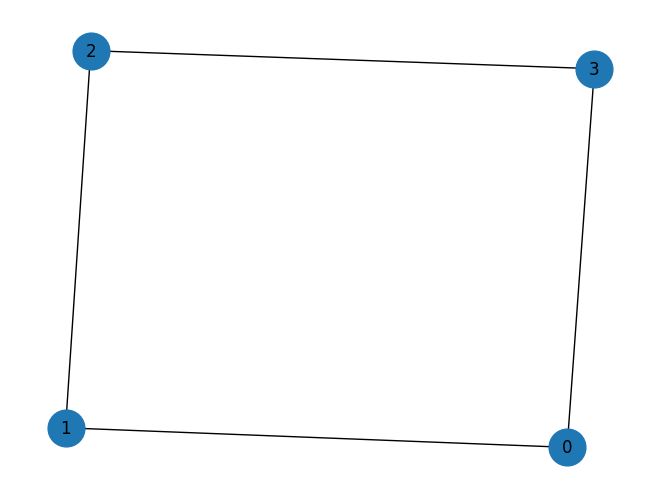

In [4]:
edges = [(0, 1), (1, 2), (2, 3), (3 , 0)]
num_nodes = 4


G = draw_graph(num_nodes, edges)
G



In [5]:
def get_1d_index(i, k, c):
    """
    Convert 2D index (i, k) to a 1D index in a grid with 'c' number of columns.

    Parameters:
    i (int): Node index.
    k (int): Color index.
    c (int): Number of colors.

    Returns:
    int: Corresponding 1D index.
    """
    return i * c + k

def constant_terms(N, C, graph, lambda1, lambda2):
    """
    Construct the constants P for the Hamiltonian.

    Parameters:
    N (int): Number of nodes.
    C (int): Number of colors.
    graph (networkx.Graph): Graph representing the nodes and edges.
    lambda1 (float): Coefficient for the first two terms.
    lambda2 (float): Coefficient for the third term.

    Returns:
    P (float): constant in the Hamiltonian.

    """
    # first constant term: sum_{k=1}^{c} N*k
    M = 0
    for k in range(1, C+1):
        M += 0.5 * N * k
    # secord constant term
    E = graph.number_of_edges()
    P = 0.25 * lambda1 * (4 * N * C + N * C * (C - 3)) + 0.25 * lambda2 * C * E + M

    return P


def magnetic_fields(N, C, graph, lambda1, lambda2):
    """
    Construct the magnetic fields h for the Hamiltonian.

    Parameters:
    N (int): Number of nodes.
    C (int): Number of colors.
    graph (networkx.Graph): Graph representing the nodes and edges.
    lambda1 (float): Coefficient for the first two terms.
    lambda2 (float): Coefficient for the third term.

    Returns:
    numpy.ndarray: Magnetic fields vector.
    """
    # sigmaz = np.array([[1, 0], [0, -1]], dtype=complex)
    dim = N * C
    h = np.zeros(dim, dtype=complex)

    # First term: (1/2) * lambda1 * sum_{i=1}^{n} sum_{k=1}^{c} k * sigma_{ik}
    for i in range(N):
        for k in range(C):
            ik = get_1d_index(i, k, C)
            coefficient = k+1
            h[ik] += 0.5 * coefficient

    # second term: (1/2) * lambda1 * sum_{i=1}^{n} sum_{k=1}^{c} (c-k-1) * sigma_{ik}
    for i in range(N):
        for k in range(C):
            ik = get_1d_index(i, k, C)
            coefficient = (C - k - 2)  # according for python index start from 0
            h[ik] += 0.5 * lambda1 * coefficient

    # third term: (1/2) * lambda1 * sum_{i=1}^{n} sum_{k' > k=1}^{c} sigma_{ik'}
    for i in range(N):
        for k in range(C - 1):
            for k_prime in range(k + 1, C):
                ik_prime = get_1d_index(i, k_prime, C)
                h[ik_prime] += 0.5 * lambda1

    # fourth term: (1/4) * lambda2 * sum_{(i,j) in E} sum_{k=1}^{c} (sigma_{ik} + sigma_{jk})
    for i, j in graph.edges:
        for k in range(C):
            ik = get_1d_index(i, k, C)

            jk = get_1d_index(j, k, C)
            h[ik] += 0.25 * lambda2
            h[jk] += 0.25 * lambda2

    return h


def interaction_strengths(N, C, graph, lambda1, lambda2):
    """
    Construct the interaction strengths matrix J.

    Parameters:
    N (int): Number of nodes.
    C (int): Number of colors.
    graph (networkx.Graph): Graph representing the nodes and edges.
    lambda1 (float): penalty constant, Coefficient for the first term.
    lambda2 (float): penalty constant, Coefficient for the second term.

    Returns:
    numpy.ndarray: Interaction strengths matrix J.
    """
    dim = N * C
    J = np.zeros((dim, dim), dtype=complex)

    # First term: (1/2) * lambda1 * sum_{i=1}^{n} sum_{k' > k=1}^{c} sigma_{ik} sigma_{ik'}
    for i in range(N):
        for k in range(C - 1):
            for k_prime in range(k + 1, C):
                ik = get_1d_index(i, k, C)
                ik_prime = get_1d_index(i, k_prime, C)
                J[ik, ik_prime] = 0.5 * lambda1

    # Second term: (1/4) * lambda2 * sum_{(i,j) in E} sum_{k=1}^{c} sigma_{ik} sigma_{jk}
    for i, j in graph.edges:
        for k in range(C):
            ik = get_1d_index(i, k, C)
            jk = get_1d_index(j, k, C)
            J[ik, jk] = 0.25 * lambda2

    return J


In [6]:

def generate_hamiltonian(N, h, J, cont):
    """
      Generate the Hamiltonian matrix for a quantum Ising model with given parameters.

      Parameters:
      N : int
          Number of spins in the system.
      h : np.ndarray
          Magnetic field array.
      J : np.ndarray
          Interaction strengths matrix.
      cont : float
          Constant term.

      Returns:
      np.ndarray
          Hamiltonian matrix.
    """
    sz = np.array([[1, 0], [0, -1]])
    ham = np.zeros((2**N, 2**N), dtype=complex)

    for ii in range(N):
        # On-site terms
        op = np.identity(2**ii)
        op = np.kron(op, sz)
        op = np.kron(op, np.identity(2**(N-ii-1)))
        ham += h[ii] * op

    for ii in range(N):
        for jj in range(ii+1, N):
            # Interaction term
            op = np.identity(2**ii)
            op = np.kron(op, sz)
            op = np.kron(op, np.identity(2**(jj-ii-1)))
            op = np.kron(op, sz)
            op = np.kron(op, np.identity(2**(N-jj-1)))
            ham += J[ii, jj] * op

    ham += cont * np.identity(2**N)

    return ham


def write_hamiltonian_to_file(ham, file_name):
    with open(file_name, 'w') as f:
        np.savetxt(f, ham)




def ground_state_solution(hamiltonian):
    """
    Find the ground states of a given Hamiltonian.

    Parameters:
    hamiltonian : np.ndarray
        Hamiltonian matrix.

    Returns:
    np.ndarray
        ground states.
    """

    eigenvalues, eigenvectors = eigh(hamiltonian)
    ground_energy = eigenvalues[0]

    # idx = np.isclose(eigenvalues, ground_energy)
    # ground_states = eigenvectors[:, idx]

    ground_states = eigenvectors[:, 0]
    #print(ground_states)

    return  ground_energy, ground_states




def expected_value(state, operator):
    """
    Calculate the expectation value of the operator with respect to the state.

    Parameters:
    state : np.ndarray
        State vector.
    operator : np.ndarray
        Operator matrix.

    Returns:
    float
        Expectation value.
    """
    return np.real(np.conj(state).T @ operator @ state)




def generate_bitstrings(N, ground_state):
    sz = np.array([[1, 0], [0, -1]])
    bit_string = np.zeros(N)

    # Print the ground state to debug
    #print("Ground state vector:\n", ground_state)

    for j in range(N):
        op = np.identity(1)
        for k in range(N):
            if k == j:
                op = np.kron(op, sz)
            else:
                op = np.kron(op, np.identity(2))

        # Normalize the ground state
        ground_state = ground_state / np.linalg.norm(ground_state)

        # Calculate the expectation value
        expectation_value = expected_value(ground_state, op)
        # print(f"Expectation value for qubit {j}: {expectation_value}")  # Debugging line

        # Assign the bit string
        if expectation_value == -1:
            bit_string[j] = 1
        else:
            bit_string[j] = 0

    #print("Generated bit string:", bit_string)  # Debugging line
    return bit_string

def generate_ising_hamiltonian(n, c, G, lambda1 = 4, lambda2 = 2):
    """
    Generate the Hamiltonian for a quantum Ising model and compute the expectation values
    of the Pauli Z matrix at each site for the ground state.

    Parameters:
    n : int
        Number of spins (qubits) in the system.
    c : float
        Constant term for Hamiltonian construction.
    G : np.ndarray
        Interaction graph matrix.
    lambda1 : float, optional
        Parameter for the magnetic fields (default is 4).
    lambda2 : float, optional
        Parameter for the interaction strengths (default is 2).

    Returns:
    np.ndarray
        Expectation values of the Pauli Z matrix at each site.
    """


    # Construct the constants
    P = constant_terms(n, c, G, lambda1, lambda2)


    # Construct the magnetic fields
    h = magnetic_fields(n, c, G, lambda1, lambda2)


    # Construct the interaction strengths matrix
    J = interaction_strengths(n, c, G, lambda1, lambda2)


    hamiltonian = generate_hamiltonian(n, h, J, P)
    #print(f'The ham shape: {hamiltonian.shape} \n')
    #write_hamiltonian_to_file(hamiltonian, 'hamiltonian.txt')
    ground_energy, ground_state = ground_state_solution(hamiltonian)


    # bit_string_values = generate_bitstrings_from_expected_values(n, ground_state)
    bit_string_values = generate_bitstrings(n, ground_state)


    print("bit strings values of sigma_z at each site:", bit_string_values)

    return  bit_string_values,  hamiltonian



### Logic issues with function below
def assign_color(result, num_color):
    """
    Generate the color map based on the result array and the number of colors.

    Parameters:
    result : np.ndarray
        Array representing the state of spins (qubits) in the system.
    num_color : int
        Number of colors to be used.

    Returns:
    list
        List of color assignments.
    """
    colors = ['blue', 'red', 'green', 'yellow', 'black', 'pink', 'purple']

    # Ensure we have at least as many colors as num_color
    if num_color > len(colors):
        raise ValueError(f"num_color must be <= {len(colors)}")

    # Select the first `num_color` colors
    selected_colors = colors[:num_color]

    color_map = []

    for idx, val in enumerate(result):
        # Cycle through the selected colors based on the bit value and index
        color = selected_colors[(int(val) + idx) % num_color]
        color_map.append(color)


    return color_map



bit strings values of sigma_z at each site: [0. 1. 1. 0.]


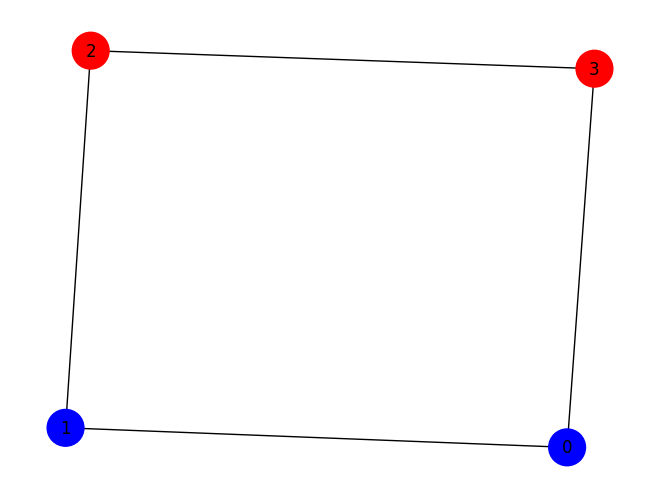

In [7]:

if __name__ == '__main__':

  N = 4
  C = 2
  result, _ = generate_ising_hamiltonian(N, C, G)
  node_colors = assign_color(result, C)


  graph = draw_graph(N, edges, node_colors)




In [8]:
# df = pd.read_csv('hamiltonian.txt', delim_whitespace=True,  header = None )
# df

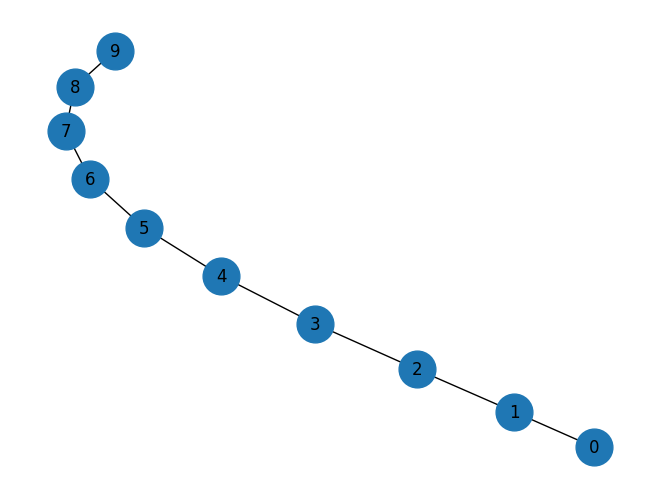

In [9]:
num_nodes= 10
color = 2
edges = [ (ii, ii+1) for ii in range(num_nodes-1)]

G_line = draw_graph(num_nodes, edges)


bit strings values of sigma_z at each site: [0. 1. 1. 0. 0. 1. 1. 0. 0. 1.]


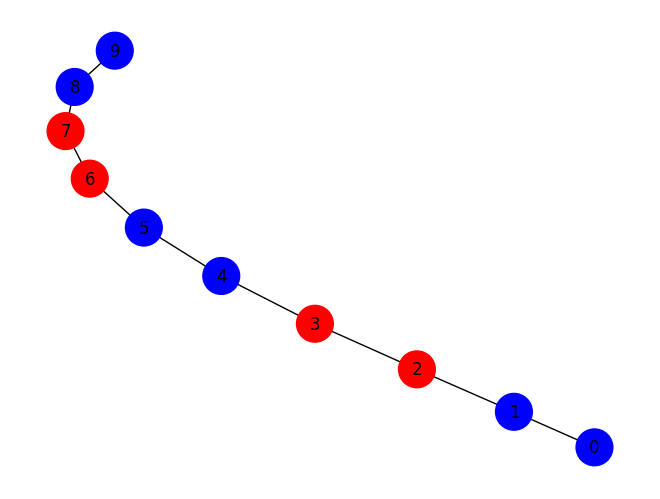

In [10]:

if __name__ == '__main__':

  N = 10
  C = 2
  opt_sol, _= generate_ising_hamiltonian(num_nodes, color, G_line )
  node_colors = assign_color(opt_sol, C)

  draw_graph(N, edges, node_colors)


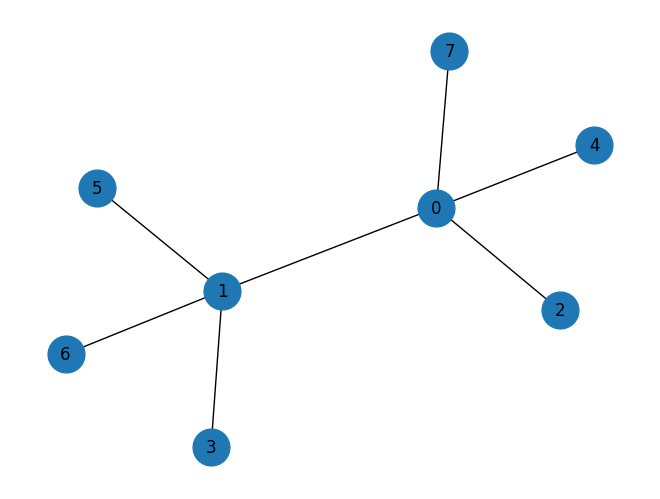

In [11]:

if __name__ == '__main__':

  N1 = 8
  C1 = 3
  edges= [(0, 1), (0, 2),(0, 7),(0, 4), (1, 5), (1, 6), (1, 3)]



  graph_dia =draw_graph(N1, edges)

bit strings values of sigma_z at each site: [0. 1. 1. 1. 1. 1. 1. 1.]


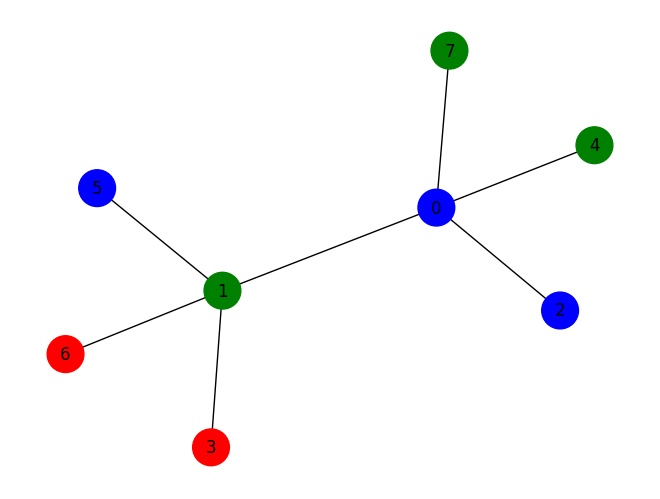

In [12]:
opt_sol1, _ = generate_ising_hamiltonian(N1, C1, graph_dia )
node_colors1 = assign_color(opt_sol1, C1)




draw_graph(N1, edges, node_colors1)

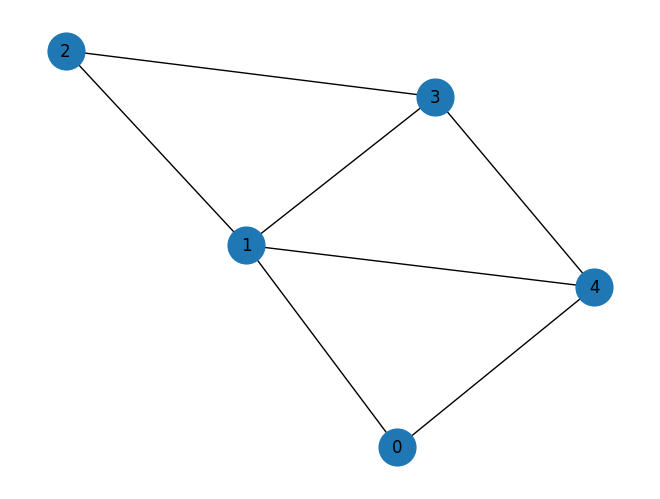

In [13]:

if __name__ == '__main__':

  N = 5
  C = 3


  edges= [(0, 1), (0, 4), (1, 2), (1, 3),(4, 1), (2, 3), (3, 4)]


  graph_com =draw_graph(N, edges)

bit strings values of sigma_z at each site: [0. 1. 1. 1. 1.]


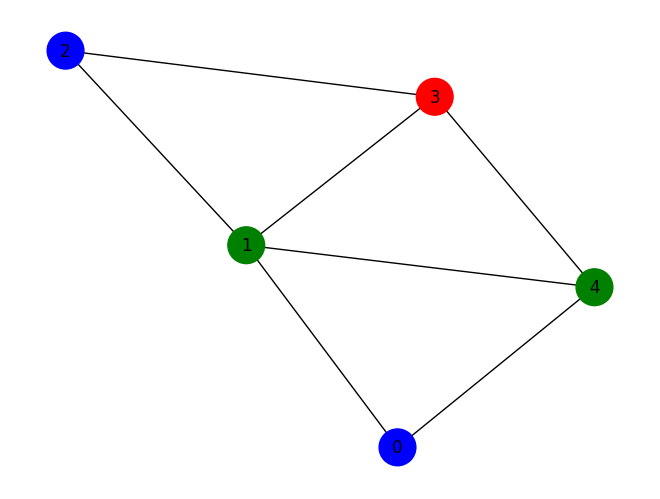

In [14]:
opt_sol_com, _= generate_ising_hamiltonian(N, C, graph_com )

node_colors1= assign_color(opt_sol_com, C)

draw_graph(N, edges, node_colors1)

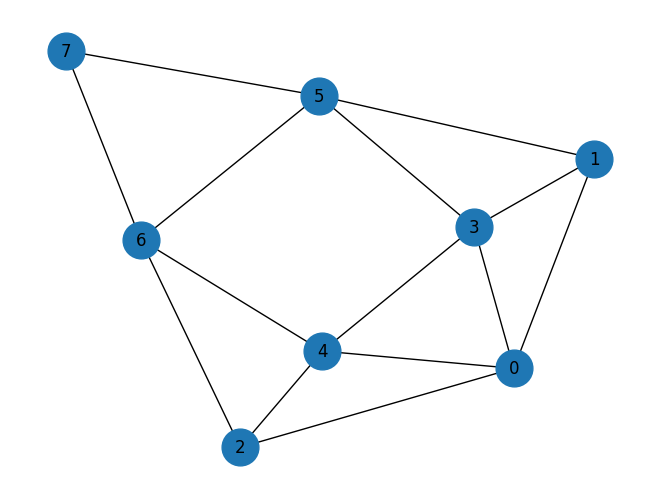

In [15]:
if __name__ == '__main__':

  N = 8
  C = 3

  edges= [(0, 1), (0, 2),(0,  3),(0, 4), (1, 3),(1, 5), (2, 4),(2, 6), (3, 4), (3 , 5),  (4, 6), (5, 6),(5, 7), (6, 7)]



  graph_com =draw_graph(N, edges)

bit strings values of sigma_z at each site: [0. 1. 1. 1. 0. 1. 1. 1.]


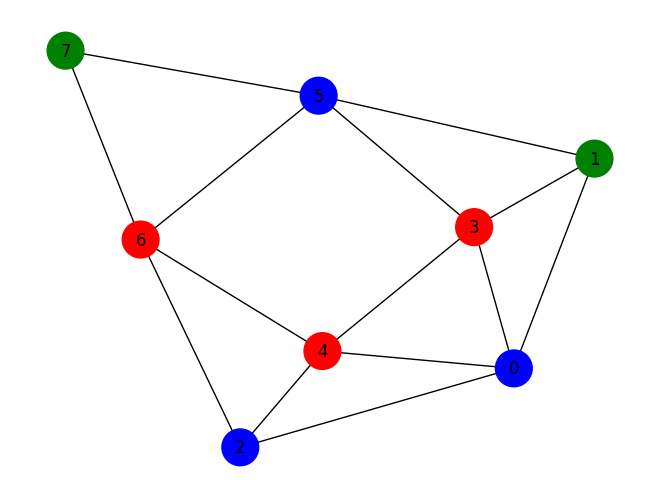

In [16]:
opt_sol_com, _ = generate_ising_hamiltonian(N, C, graph_com )

node_colors= assign_color(opt_sol_com, C)

draw_graph(N, edges, node_colors)

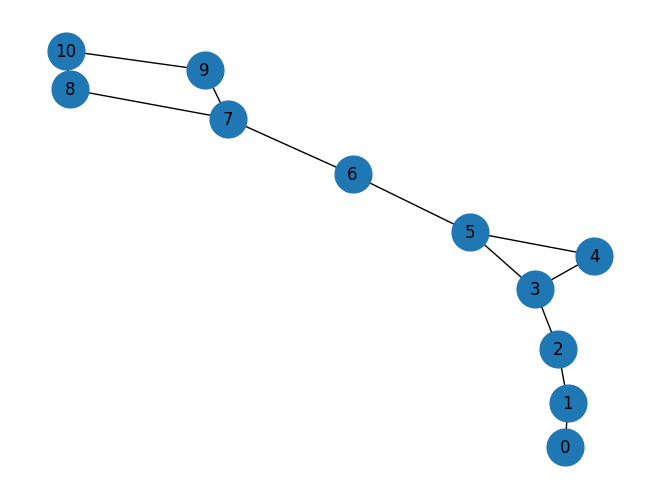

In [17]:
edgesList= [(0, 1), (1, 2), (2, 3), (3, 4), (3, 5),
            (4, 5), (5, 6), (6, 7),  (6, 7), (7, 8),
             (7, 8), (7, 9), (8, 10), (9, 10)]
N = 11
C= 3

graph_list =draw_graph(N, edgesList)

bit strings values of sigma_z at each site: [1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1.]


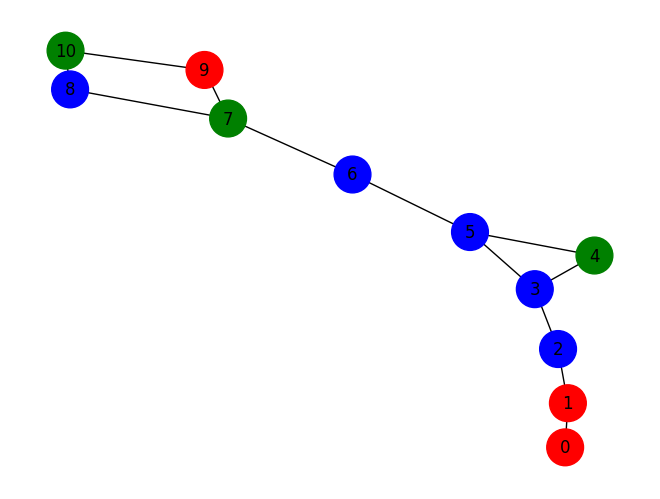

In [18]:
res, _ = generate_ising_hamiltonian(N, C, graph_com )

node_colors= assign_color(res, C)

draw_graph(N, edgesList, node_colors)